In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

crm = pd.read_csv('C:\\Users\\gonca\\Downloads\\NOVA_IMS\\DSML\\crm.csv')
mkt = pd.read_csv('C:\\Users\\gonca\\Downloads\\NOVA_IMS\\DSML\\mkt.csv')
sales = pd.read_excel('C:\\Users\\gonca\\Downloads\\NOVA_IMS\\DSML\\sales.xlsx')


##### Importing data 

In [47]:
#mkt.head(5)
#crm.head(5)
#sales.head(5)

In [48]:
crm.info()  #Make an endoorsment about data 
mkt.info()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      7000 non-null   int64  
 1   Name            7000 non-null   object 
 2   Birthyear       7000 non-null   int64  
 3   Education       6986 non-null   object 
 4   Marital_Status  7000 non-null   object 
 5   Income          7000 non-null   float64
 6   Kid_Younger6    7000 non-null   int64  
 7   Children_6to18  7000 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 437.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     7023 non-null   int64
 1   Response_Cmp1  7023 non-null   int64
 2   Response_Cmp2  7023 non-null   int64
 3   Response_Cmp3  7023 non-null   int64
 4   Response_Cmp4  70

#### Here we have some info about our data. On a first look we can see the name of the variables, total number of observations, the type of each variable and we can also see if we have missing data. By looking at the info displayed we can see that there is missing data in 'Education' from the CRM dataset and Recency and  MntDrinks from the Sales dataset.

In [49]:
print(crm['Education'].unique())
print(crm['Marital_Status'].unique())

['Graduation' 'PhD' 'HighSchool' 'Master' 'Basic' 'master' nan
 'graduation' 'phd' 'highschool']
['Single' 'Together' 'Married' 'Divorced' 'married' 'Widow' 'together'
 'divorced' 'single' 'widow']


In [50]:
crm['Education'].replace(['Graduation', 'PhD', 'HighSchool', 'Master', 'Basic'],['graduation', 'phd', 'highschool', 'master', 'basic'], inplace = True)
crm['Marital_Status'].replace(['Single', 'Together', 'Married', 'Divorced', 'Widow'], ['single', 'together', 'married', 'divorced', 'widow'], inplace = True)


### Feature engeneering:

#### Making an "Education", "Male", "Age" and "Income_bins" column

<AxesSubplot:ylabel='Children_6to18'>

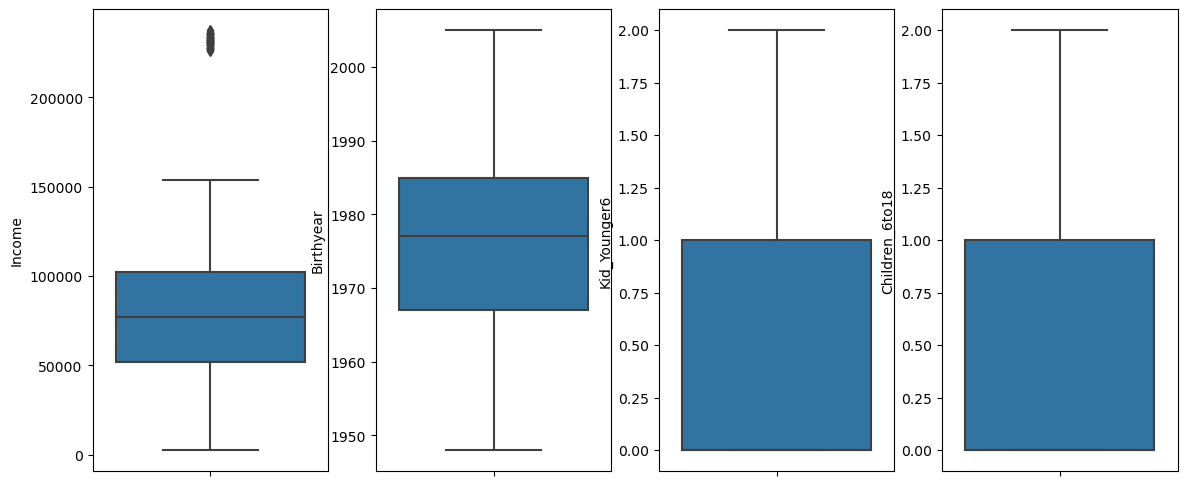

In [51]:
#low income from 2493,8 to 49899.036, Medium income from 49899.036 to 99798.072, high income from 99798.072 to 153703

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (14,6))
sns.boxplot(ax = ax1, data = crm, y = 'Income')
sns.boxplot(ax = ax2, data = crm, y = 'Birthyear')
sns.boxplot(ax = ax3, data = crm, y = 'Kid_Younger6')
sns.boxplot(ax = ax4, data = crm, y = 'Children_6to18')

#### Looking into the "Income" plot we see that there are some outliers. My solution will be remove them because they represent a low percentage in the whole dataset.

In [52]:
crm.drop(crm[crm['Income'] > 200000].index, inplace = True)

#### Removing outliers

In [53]:
crm['Higher_Educ'] = np.where((crm['Education']=='graduation')|
                               (crm['Education']=='master')|
                               (crm['Education']=='phd'),1,0)
crm.drop('Education', axis =1, inplace = True)

crm['Male'] = np.where(crm['Name'].str.contains('Mr.'),1,0)
crm.drop('Name', axis =1, inplace=True)

today = datetime.now()
crm['Age'] = today.year - crm['Birthyear']
crm.drop('Birthyear', axis =1, inplace=True)

crm['Income_bins'] = pd.cut(crm['Income'], 3, labels=["Low", "Medium", "High"])


In [54]:
crm.head(5)

,CustomerID,Marital_Status,Income,Kid_Younger6,Children_6to18,Higher_Educ,Male,Age,Income_bins
0,14594,single,113947.0,0,0,1,0,42,High
1,19070,together,114297.0,0,0,1,0,49,High
2,29888,together,115476.0,0,0,1,1,63,High
3,12221,married,101172.0,1,1,1,1,43,Medium
4,21107,single,123128.0,0,0,0,1,52,High
6,33446,married,70509.0,0,1,1,1,55,Medium
7,33803,divorced,71692.0,0,1,1,1,42,Medium
8,5105,married,26231.0,1,0,0,1,27,Low
9,12974,married,40298.0,0,0,1,1,48,Low
10,31097,together,98807.0,0,0,1,1,67,Medium


In [55]:
crm.set_index('CustomerID', inplace = True)

In [56]:
crm.drop_duplicates(inplace = True)

In [57]:
crm.isna().sum()

Marital_Status    0
Income            0
Kid_Younger6      0
Children_6to18    0
Higher_Educ       0
Male              0
Age               0
Income_bins       0
dtype: int64

In [58]:
crm.drop('Income', axis = 1, inplace = True)


Marital_status = pd.get_dummies(crm['Marital_Status'])
Income_bins = pd.get_dummies(crm['Income_bins'])
crm = pd.merge(crm, Marital_status, left_index=True, right_index=True)
crm = pd.merge(crm, Income_bins, left_index=True, right_index=True)
crm.drop('Income_bins', axis = 1, inplace = True)
crm.drop('Marital_Status', axis = 1, inplace = True)
crm.head()


,Kid_Younger6,Children_6to18,Higher_Educ,Male,Age,divorced,married,single,together,widow,Low,Medium,High
CustomerID,,,,,,,,,,,,,
14594,0,0,1,0,42,0,0,1,0,0,0,0,1
19070,0,0,1,0,49,0,0,0,1,0,0,0,1
29888,0,0,1,1,63,0,0,0,1,0,0,0,1
12221,1,1,1,1,43,0,1,0,0,0,0,1,0
21107,0,0,0,1,52,0,0,1,0,0,0,0,1


In [61]:
crm.query("Age < 20 and single != 1")
crm.query("Age < 20 and (Kid_Younger6 == 1 or Children_6to18 == 1)")

,Kid_Younger6,Children_6to18,Higher_Educ,Male,Age,divorced,married,single,together,widow,Low,Medium,High
CustomerID,,,,,,,,,,,,,
5105,1,0,0,1,27,0,1,0,0,0,1,0,0
12974,0,0,1,1,48,0,1,0,0,0,1,0,0
21278,1,0,1,0,35,0,0,0,1,0,1,0,0
23564,1,1,1,1,40,0,0,0,1,0,1,0,0
16223,0,0,1,1,53,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8723,1,0,1,1,45,0,0,1,0,0,1,0,0
20453,1,0,1,0,46,0,0,1,0,0,1,0,0
10769,1,0,1,1,46,0,1,0,0,0,1,0,0


### Checking for potencial inconsistencies in data

<AxesSubplot:>

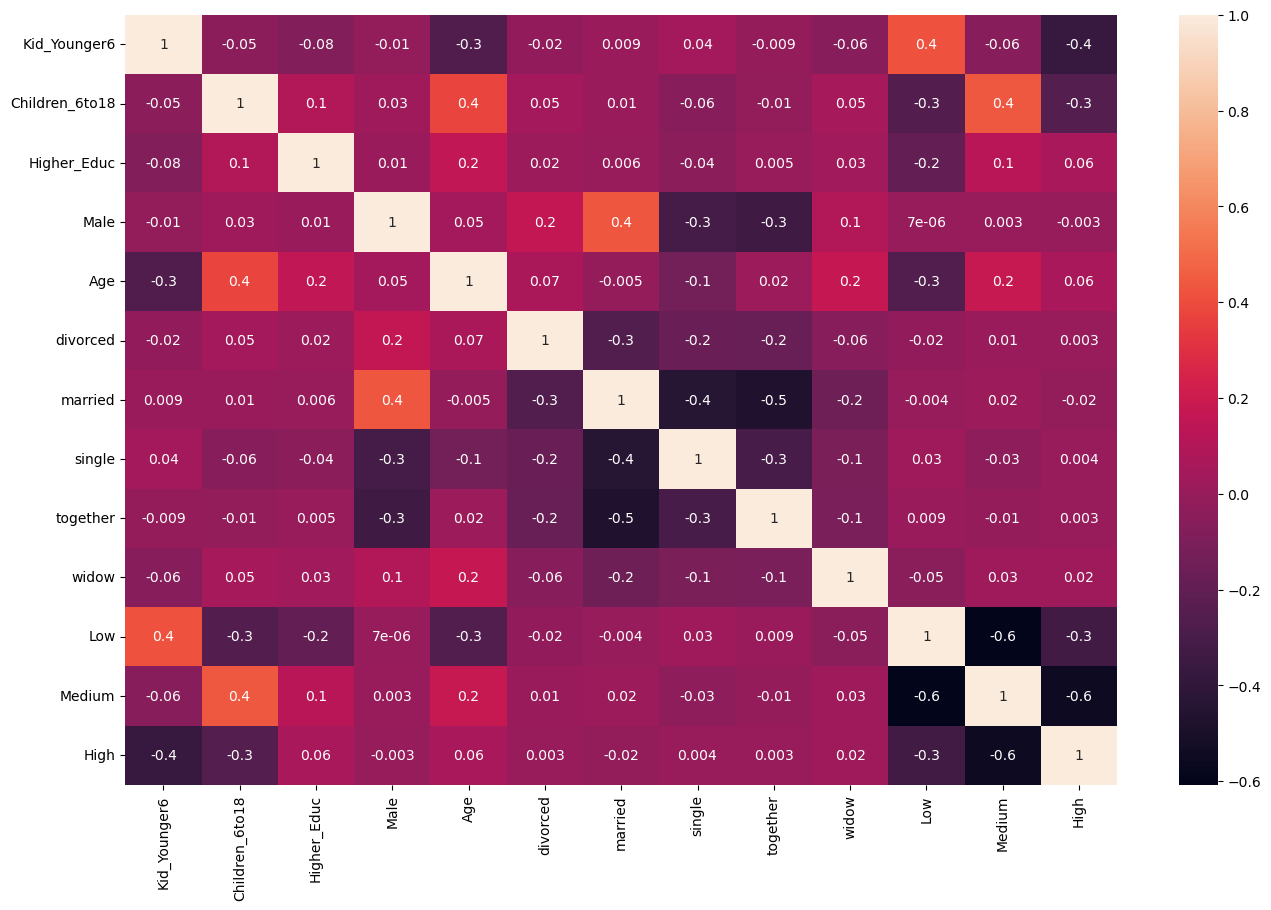

In [62]:
df_corr = crm.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [63]:
sales.head(5)

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0


In [64]:
sales['Date_Adherence'] = np.where(sales['Date_Adherence'] == '2/29/2022', '2/28/2022', sales['Date_Adherence'])

In [65]:
sales['Date_Adherence'] = pd.to_datetime(sales['Date_Adherence'])

In [66]:
sales.set_index('CustomerID', inplace = True)
sales.head(5)

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,
11054,2021-03-18,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
17117,2021-03-01,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
31751,2021-11-01,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
12947,2022-05-19,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
11402,2021-01-01,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0


In [68]:
print(sales.duplicated().sum())

8


In [69]:
print(sales.isna().sum())

Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
dtype: int64


In [70]:
sales.drop_duplicates(inplace = True)
sales.fillna({
    
    'Recency': sales['Recency'].median(),
    'MntDrinks': sales['MntDrinks'].median()
    
}, inplace = True)

In [72]:
sales[sales.isna().any(axis=1)]

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,


In [73]:
sales['TotalNumPurchases'] = sales['NumOfferPurchases'] + sales['NumAppPurchases'] + sales['NumTakeAwayPurchases'] + sales['NumStorePurchases']
sales['TotalMntSpent'] = sales['MntMeat&Fish'] + sales['MntEntries'] + sales['MntVegan&Vegetarian'] + sales['MntDrinks'] + sales['MntDesserts'] + sales['MntAdditionalRequests']
sales['MntSpentPerEntry'] = sales['TotalMntSpent'] / sales['TotalNumPurchases']

In [74]:
sales.rename(columns = {'MntMeat&Fish': 'MntMeatAndFish', 'MntVegan&Vegetarian': 'MntVeganAndVegetarian'}, inplace = True)

In [75]:
#sales.head(5) Here i just realized that we have some costumers with amount spent on the restaurant but it no purchases resgistered
sales.query("TotalMntSpent > 0 and (NumOfferPurchases == 0 and NumAppPurchases == 0 and NumTakeAwayPurchases == 0 and NumStorePurchases == 0)")

,Date_Adherence,Recency,MntMeatAndFish,MntEntries,MntVeganAndVegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,TotalNumPurchases,TotalMntSpent,MntSpentPerEntry
CustomerID,,,,,,,,,,,,,,,,,
5318,2021-01-26,16.0,5.0,8,7.5,6.0,4.0,1.0,0,0,0,0,20,0,0,31.5,inf
14084,2022-04-22,17.0,11.0,10,36.0,6.0,10.0,0.4,0,0,0,0,19,0,0,73.4,inf
5108,2022-03-07,93.0,286.0,246,382.5,138.0,76.0,2.3,0,0,0,0,19,0,0,1130.8,inf
31586,2021-09-22,39.0,42.0,26,76.5,2.0,20.0,2.0,0,0,0,0,0,0,0,168.5,inf
15911,2021-07-01,23.0,4.0,6,4.5,6.0,14.0,0.4,0,0,0,0,20,0,0,34.9,inf
28916,2020-09-16,72.0,9.0,8,37.5,24.0,36.0,2.8,0,0,0,0,1,0,0,117.3,inf
22133,2021-03-26,30.0,39.0,18,37.5,24.0,66.0,1.0,0,0,0,0,20,1,0,185.5,inf
26711,2021-09-08,14.0,7.0,4,15.0,6.0,2.0,0.1,0,0,0,0,1,0,0,34.1,inf
10622,2022-06-05,46.0,81.0,0,55.5,8.0,46.0,4.3,0,0,0,0,1,0,0,194.8,inf


In [76]:
sales.drop(sales[ (sales['TotalMntSpent'] > 0) & (sales['NumOfferPurchases'] == 0 & sales['NumAppPurchases'] & sales['NumTakeAwayPurchases'] & sales['NumStorePurchases'])].index, inplace = True)
sales.query("TotalMntSpent > 0 and (NumOfferPurchases == 0 and NumAppPurchases == 0 and NumTakeAwayPurchases == 0 and NumStorePurchases == 0)")

,Date_Adherence,Recency,MntMeatAndFish,MntEntries,MntVeganAndVegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,TotalNumPurchases,TotalMntSpent,MntSpentPerEntry
CustomerID,,,,,,,,,,,,,,,,,


<AxesSubplot:ylabel='NumAppVisitsMonth'>

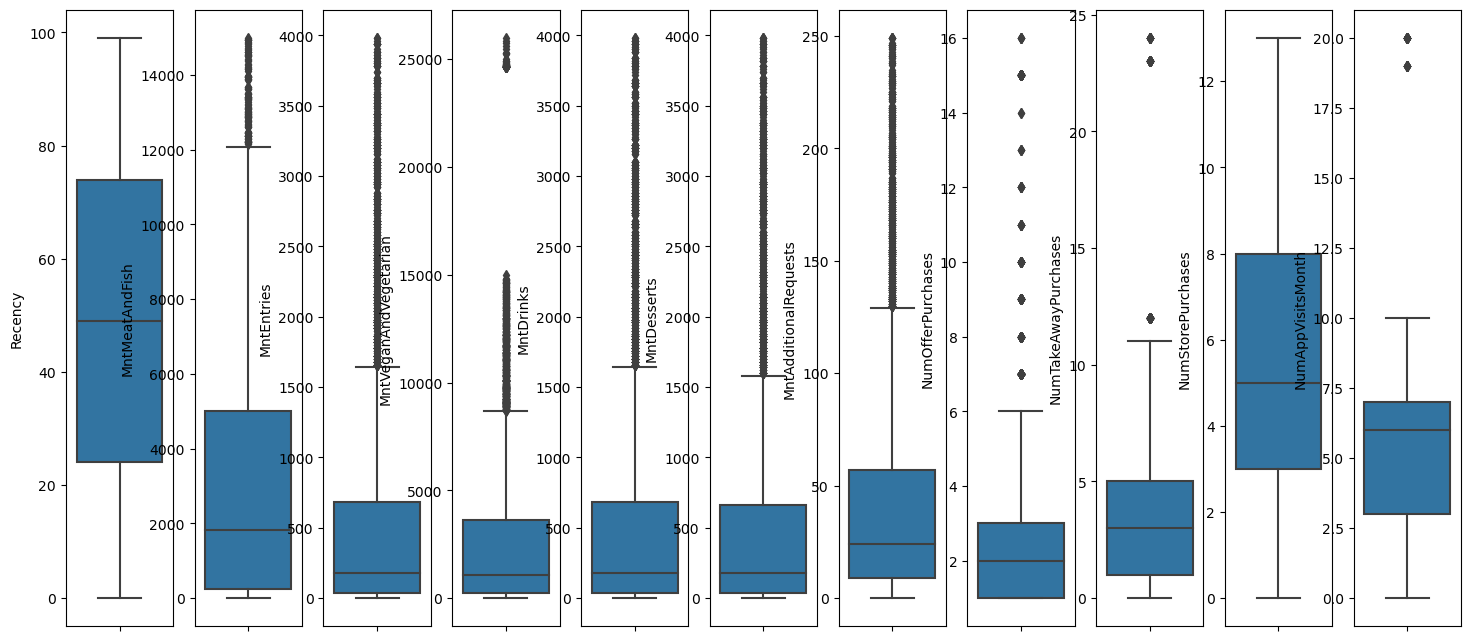

In [77]:
sales_plots= sales[['Recency', 'MntMeatAndFish', 'MntEntries', 'MntVeganAndVegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases','NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth']].copy()
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9,ax10,ax11) = plt.subplots(1, 11, figsize=(18, 8))

sns.boxplot(ax=ax1, data = sales , y = 'Recency')
sns.boxplot(ax=ax2, data = sales , y = 'MntMeatAndFish')
sns.boxplot(ax=ax3, data = sales , y = 'MntEntries')
sns.boxplot(ax=ax4, data = sales , y = 'MntVeganAndVegetarian')
sns.boxplot(ax=ax5, data = sales , y = 'MntDrinks')
sns.boxplot(ax=ax6, data = sales , y = 'MntDesserts')
sns.boxplot(ax=ax7, data = sales , y = 'MntAdditionalRequests')
sns.boxplot(ax=ax8, data = sales , y = 'NumOfferPurchases')
sns.boxplot(ax=ax9, data = sales , y = 'NumTakeAwayPurchases')
sns.boxplot(ax=ax10, data = sales , y = 'NumStorePurchases')
sns.boxplot(ax=ax11, data = sales , y = 'NumAppVisitsMonth')


In [78]:
sales.drop(sales[sales['MntVeganAndVegetarian'] > 3500].index, inplace = True)
sales.drop(sales[sales['NumTakeAwayPurchases'] > 20].index, inplace = True)
sales.drop(sales[sales['NumAppVisitsMonth'] > 17].index, inplace = True)

<AxesSubplot:ylabel='NumAppVisitsMonth'>

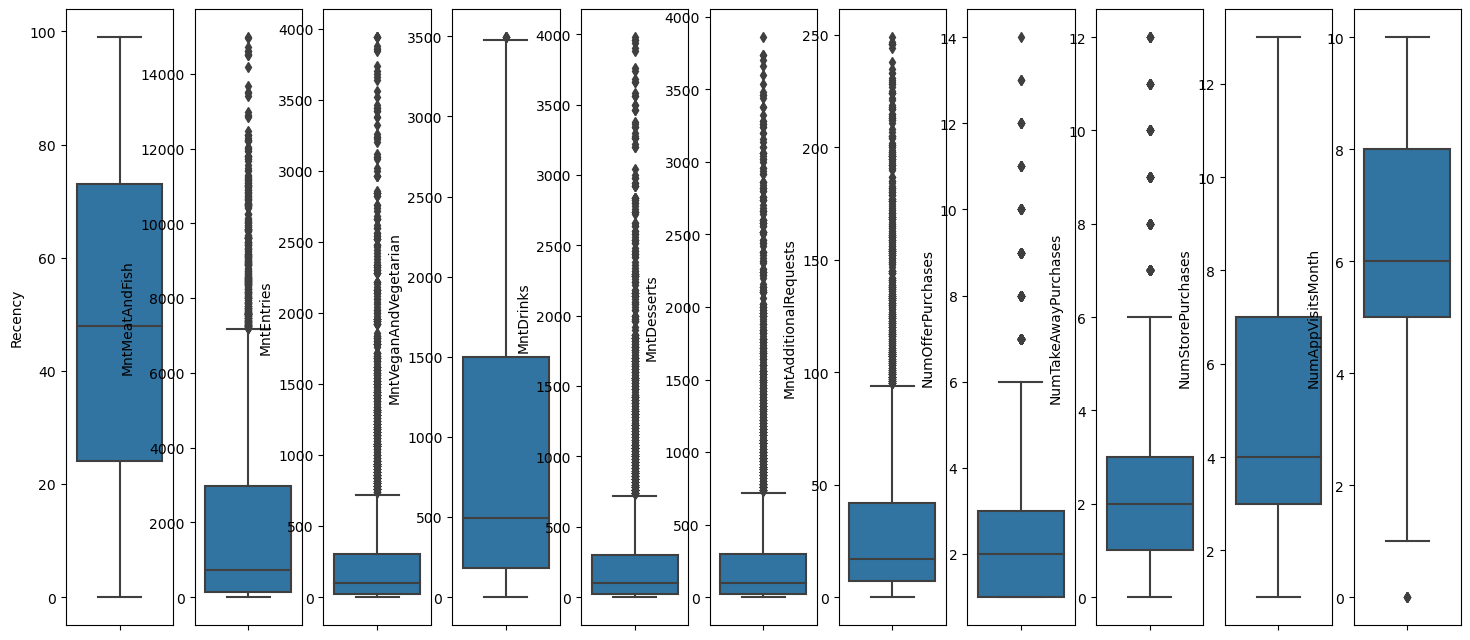

In [79]:
sales_plots= sales[['Recency', 'MntMeatAndFish', 'MntEntries', 'MntVeganAndVegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases','NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth']].copy()
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(1, 11, figsize=(18, 8))

sns.boxplot(ax=ax1, data = sales , y = 'Recency')
sns.boxplot(ax=ax2, data = sales , y = 'MntMeatAndFish')
sns.boxplot(ax=ax3, data = sales , y = 'MntEntries')
sns.boxplot(ax=ax4, data = sales , y = 'MntVeganAndVegetarian')
sns.boxplot(ax=ax5, data = sales , y = 'MntDrinks')
sns.boxplot(ax=ax6, data = sales , y = 'MntDesserts')
sns.boxplot(ax=ax7, data = sales , y = 'MntAdditionalRequests')
sns.boxplot(ax=ax8, data = sales , y = 'NumOfferPurchases')
sns.boxplot(ax=ax9, data = sales , y = 'NumTakeAwayPurchases')
sns.boxplot(ax=ax10, data = sales , y = 'NumStorePurchases')
sns.boxplot(ax=ax11, data = sales , y = 'NumAppVisitsMonth')

<AxesSubplot:>

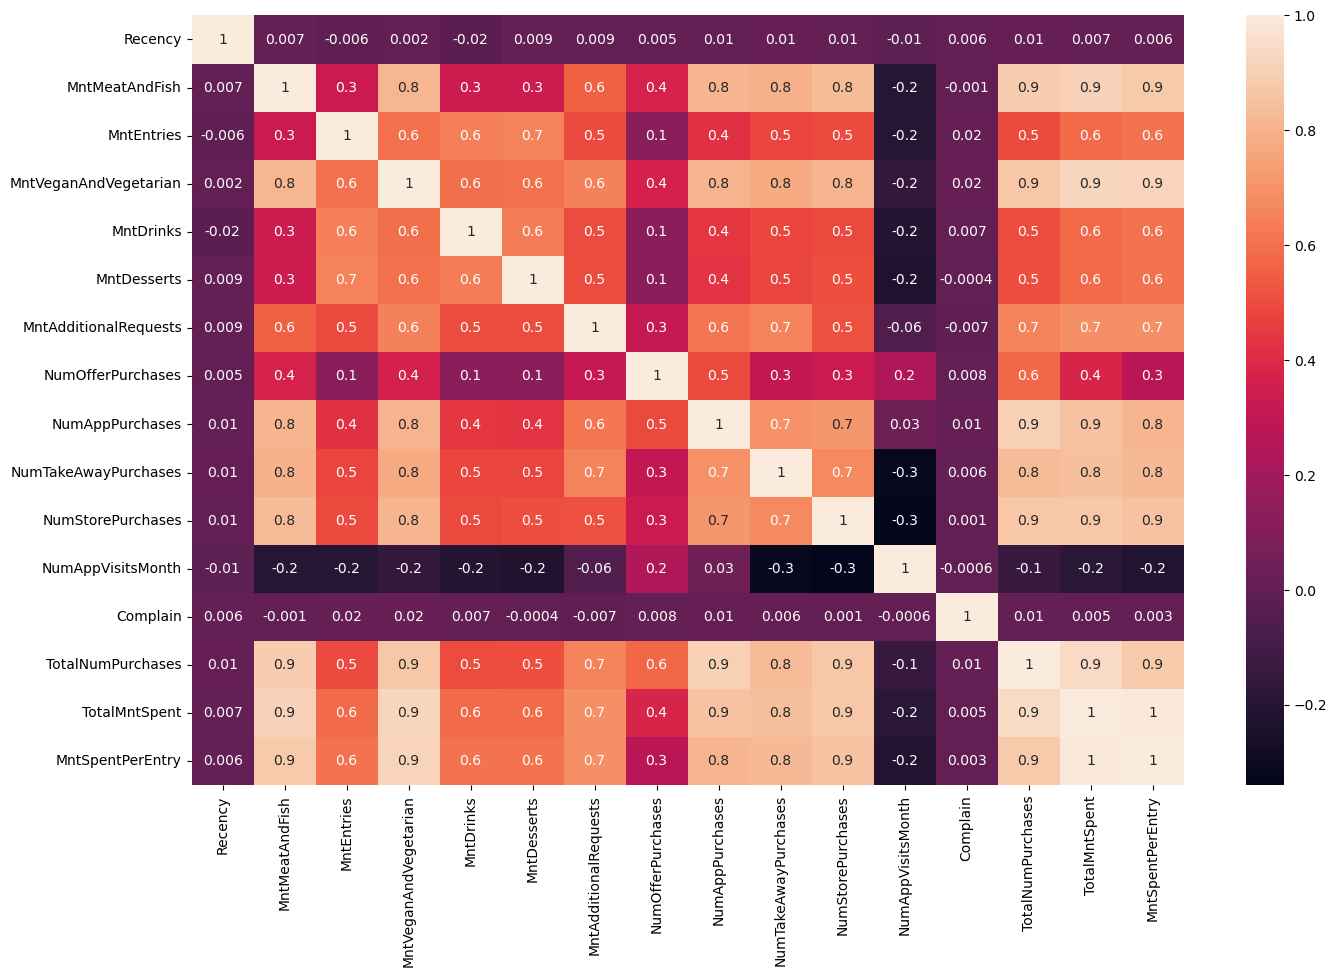

In [80]:
df_corr_sales = sales.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr_sales, annot=True, fmt = '.1g')